In [95]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.externals import joblib


In [96]:
data = pd.read_csv("Dell_data_500.csv")

In [97]:
data.head(5)

,asin,C1,C2,C3,P1,P2,P3,Review Sentiment,Service Rating,Customer Sentiment
0,B000004306,3,1,6,3,1,6,3.67,2,4.3
1,B000007173,4,5,1,7,1,2,3.90,3,3.7
2,B000007207,5,1,4,6,3,1,2.61,5,4.0
3,B00000J47F,8,1,1,5,3,2,1.70,1,2.4
4,B00000J6WY,6,2,2,6,4,0,1.50,2,2.2


In [98]:
data.describe()

,C1,C2,C3,P1,P2,P3,Review Sentiment,Service Rating,Customer Sentiment
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,5.391566,2.415663,2.192771,5.457831,2.459839,2.090361,2.026827,2.929719,3.526305
std,1.343173,1.371569,1.385099,1.412516,1.327390,1.300777,0.928311,1.441369,0.694395
min,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.470000,2.000000,3.100000
50%,5.000000,2.000000,2.000000,6.000000,2.000000,2.000000,1.940000,3.000000,3.600000
75%,6.000000,3.000000,3.000000,6.000000,3.000000,3.000000,2.690000,4.000000,4.100000
max,9.000000,7.000000,6.000000,9.000000,6.000000,6.000000,4.710000,5.000000,5.000000


In [99]:
train = data[data.columns[1:9]]

In [100]:
train.shape

(498, 8)

In [101]:
train.head()

,C1,C2,C3,P1,P2,P3,Review Sentiment,Service Rating
0,3,1,6,3,1,6,3.67,2
1,4,5,1,7,1,2,3.90,3
2,5,1,4,6,3,1,2.61,5
3,8,1,1,5,3,2,1.70,1
4,6,2,2,6,4,0,1.50,2


In [102]:
label = data['Customer Sentiment']

In [103]:
label.shape

(498,)

In [104]:
label.head()

0    4.3
1    3.7
2    4.0
3    2.4
4    2.2
Name: Customer Sentiment, dtype: float64

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

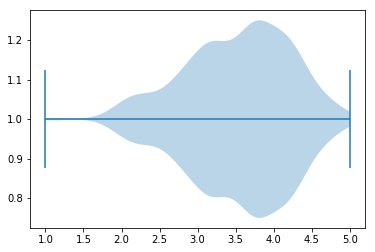

In [106]:
fig, ax = plt.subplots()
ax.violinplot(label, vert=False)
plt.show()

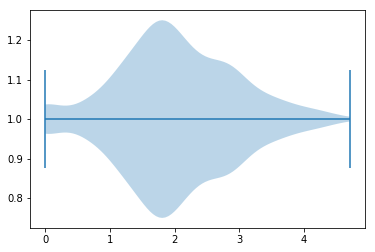

In [107]:
fig, ax = plt.subplots()
ax.violinplot(data['Review Sentiment'], vert=False)
plt.show()

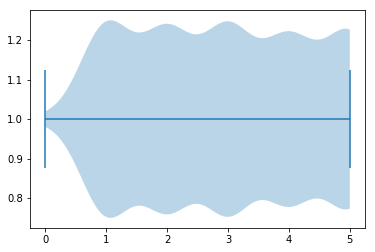

In [108]:
fig, ax = plt.subplots()
ax.violinplot(data['Service Rating'], vert=False)
plt.show()

In [109]:
x_train , x_test , y_train , y_test = train_test_split(train,label, test_size = 0.25,random_state =2)

In [110]:
x_train.shape

(373, 8)

In [111]:
x_test.shape

(125, 8)

In [112]:
 y_train.shape 

(373,)

In [113]:
y_test.shape

(125,)

In [114]:
clf = linear_model.LinearRegression(normalize = True)

In [115]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [116]:
clf.score(x_test,y_test)

0.6152714609009439

In [117]:
clf2 = linear_model.Lasso(alpha=0.1)

In [118]:
clf2.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [119]:
clf2.score(x_test,y_test)

0.5869914777869584

In [120]:
clf3 = linear_model.Ridge(alpha=0.1,normalize=False)

In [121]:
clf3.fit(x_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [122]:
clf3.score(x_test,y_test)

0.6152789730303546

In [123]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [ ]:
y_rbf = svr_rbf.fit(x_train,y_train)
y_lin = svr_lin.fit(x_train,y_train)
y_poly = svr_poly.fit(x_train,y_train)

In [ ]:
y_rbf.score(x_test,y_test)

In [ ]:
y_lin.score(x_test,y_test)

In [ ]:
y_poly.score(x_test,y_test)

In [ ]:
joblib.dump(clf3,'trained.pkl') 